<a href="https://colab.research.google.com/github/redrosesarecool/staz/blob/main/przyk%C5%82ady_z_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Demo of DBSCAN clustering algorithm**


DBSCAN działa tak:
* Wybiera jeden punkt i sprawdza, ilu sąsiadów ma w określonej odległości (promieniu ε).
* Jeśli punkt ma wystarczająco dużo sąsiadów (co najmniej minPts), to tworzy z nim „rdzeń klastra” i dołącza do niego sąsiadów.
* Proces powtarza się dla nowych punktów w klastrze, aż nie da się już dodać kolejnych.
* Punkty, które nie pasują do żadnego klastra, są oznaczane jako szum (outliers).

sklearn.datasets.make_blobs -> Generates isotropic Gaussian blobs for clustering.

In [21]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.6, random_state=0
)

X = StandardScaler().fit_transform(X) # standaryzacja danych - funkcja wbudowanna

We can visualize the resulting data:

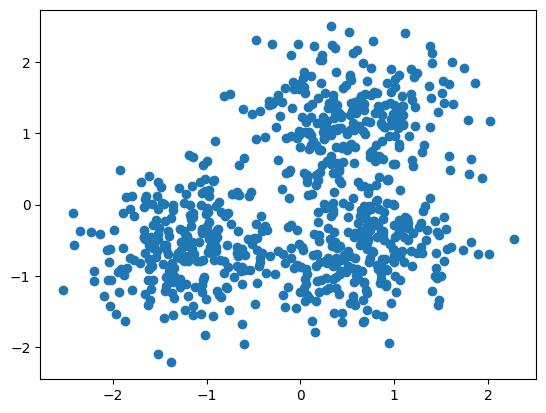

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

One can access the labels assigned by DBSCAN using the labels_ attribute. Noisy samples are given the label
.

In [23]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.23, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 125


Clustering is usually unsupervised, but when synthetic data with known labels (like from make_blobs) is used, supervised metrics such as homogeneity, completeness, or adjusted Rand index can evaluate cluster quality. If true labels are unknown, evaluation must rely on internal measures like the Silhouette Coefficient.

In [24]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.383
Completeness: 0.433
V-measure: 0.406
Adjusted Rand Index: 0.367
Adjusted Mutual Information: 0.405
Silhouette Coefficient: 0.280


Core samples (large dots) and non-core samples (small dots) are color-coded according to the assigned cluster. Samples tagged as noise are represented in black.

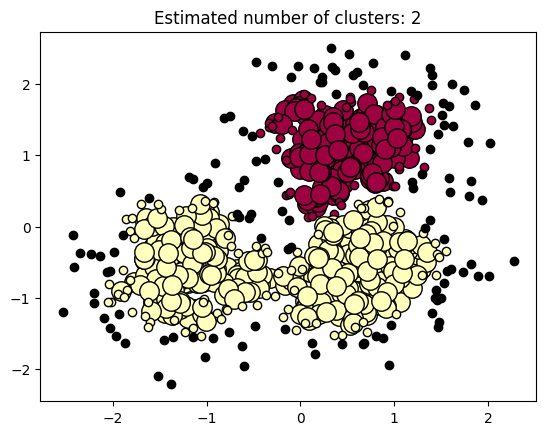

In [25]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# Własna prezentacja klastrów algorytmem DBSCAN

Wizualne przedstawienie liczby klastrów w funkcji espilon, i liczba tych czarnych bez klastra (szumów)

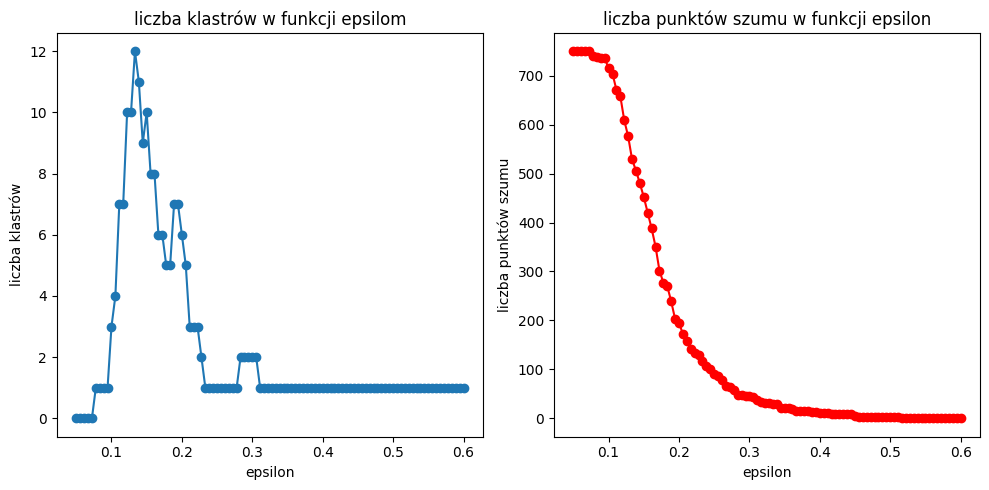

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# dane - pierwszy element z przykładowego kodu
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.6, random_state=0
)

X = StandardScaler().fit_transform(X)

# zakres epsilon,
eps_values = np.linspace(0.05, 0.6, 100)  # 100 kroków od 0.05 do 0.6, bo po 0.6 nic się nie zmienia już
n_clusters_list = []
n_noise_list = []

#pętla gdzie generowane są liczby klastrów w zależności od warości epsilon
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # liczba klastów
    n_noise = list(labels).count(-1) # liczba puntów szumu

    n_clusters_list.append(n_clusters) # lista do zapisania wartości do wykresu
    n_noise_list.append(n_noise)

# wykresy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1) #plt.subplot(n_rows, n_cols, index), żeby były dwa wykresy obok siebie w rzędzie
plt.plot(eps_values, n_clusters_list, marker="o")
plt.xlabel("epsilon")
plt.ylabel("liczba klastrów")
plt.title("liczba klastrów w funkcji epsilom")

plt.subplot(1, 2, 2)
plt.plot(eps_values, n_noise_list, marker="o", color="red")
plt.xlabel("epsilon")
plt.ylabel("liczba punktów szumu")
plt.title("liczba punktów szumu w funkcji epsilon")

plt.tight_layout()
plt.show()

Wizualne przedstawienie liczby klastrów w funkcji espilon, i liczba tych czarnych bez klastra (szumów) dla różnych wartości epsilom

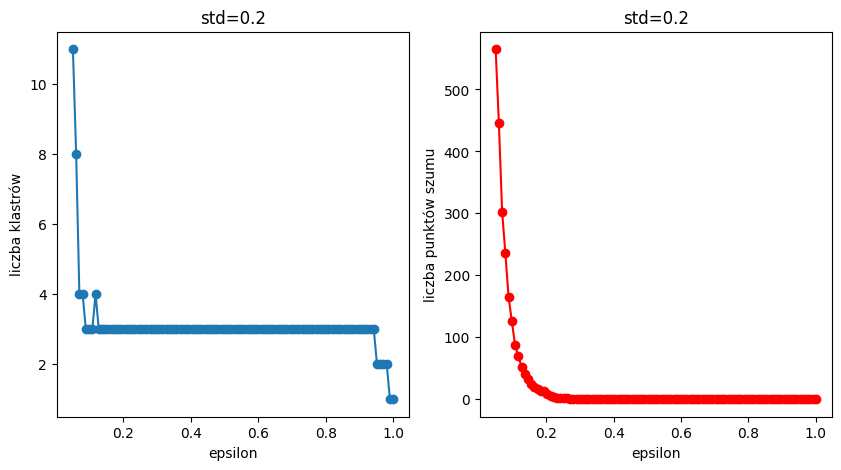

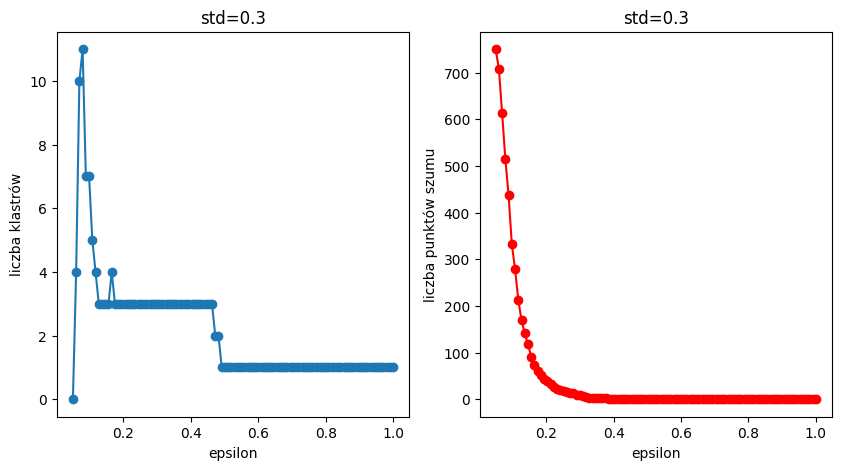

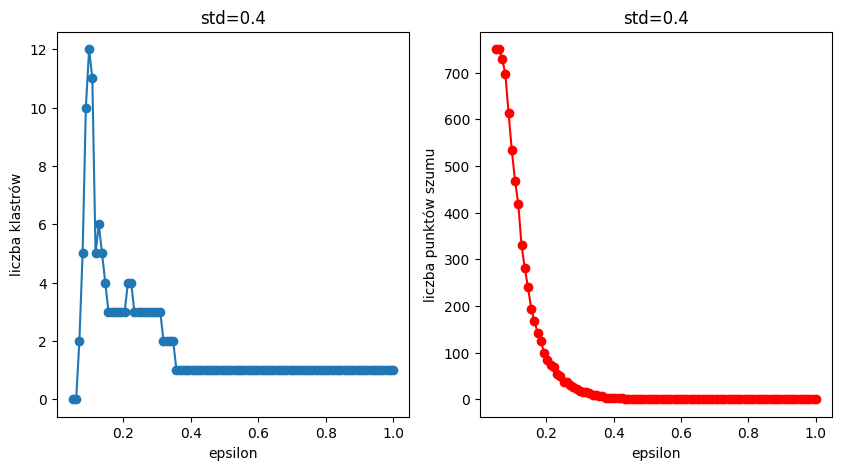

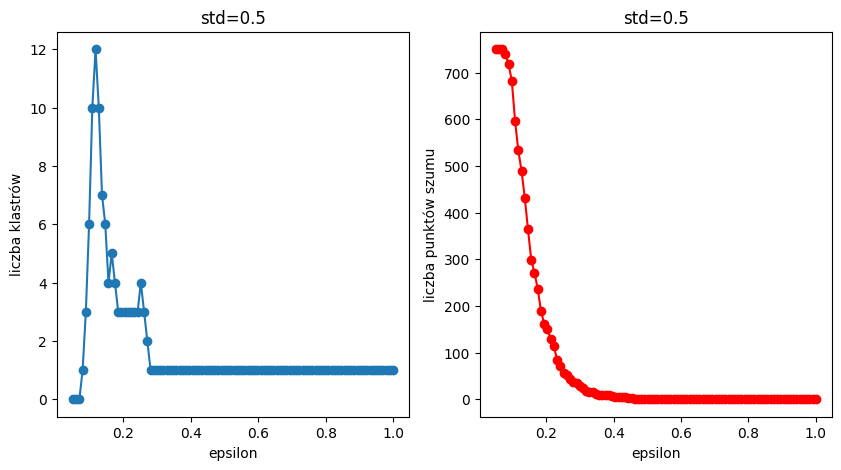

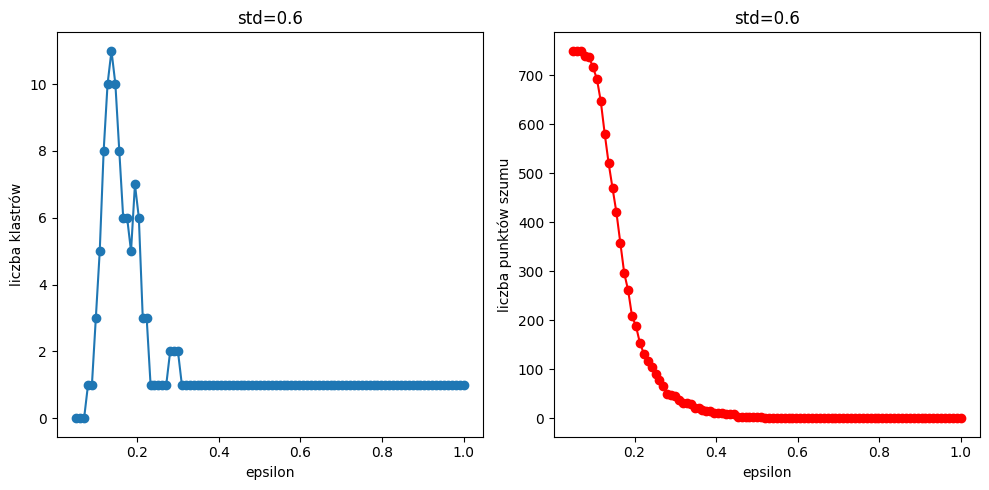

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# parametry
centers = [[1, 1], [-1, -1], [1, -1]]
cluster_stds = [0.2, 0.3, 0.4, 0.5, 0.6]  # różne warttości std
eps_values = np.linspace(0.05, 1.0, 100)  # 100 kroków od 0.05 do 1.0

# dane - generowanie ich z make_blobs
for i, std in enumerate(cluster_stds):
    X, labels_true = make_blobs(
        n_samples=750, centers=centers, cluster_std=std, random_state=0
    )
    X = StandardScaler().fit_transform(X)

    n_clusters_list = []
    n_noise_list = []

    # pętla gdzie generowane są liczby klastrów w zależności od warości epsilon
    for eps in eps_values:
        db = DBSCAN(eps=eps, min_samples=10).fit(X)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        n_clusters_list.append(n_clusters)
        n_noise_list.append(n_noise)

    # wykresy dla każdego cluster_std
    plt.figure(figsize=(10, 5))

    # wykres - liczba klastrów
    plt.subplot(1, 2, 1)
    plt.plot(eps_values, n_clusters_list, marker="o")
    plt.xlabel("epsilon")
    plt.ylabel("liczba klastrów")
    plt.title(f"std={std}")

    # wykres - liczba punktów szum
    plt.subplot(1, 2, 2)
    plt.plot(eps_values, n_noise_list, marker="o", color="red")
    plt.xlabel("epsilon")
    plt.ylabel("liczba punktów szumu")
    plt.title(f"std={std}")

plt.tight_layout()
plt.show()

Wizualne przedstawienie klastrów dla wybranych wartości episoln oraz przy różnych wartości cluster_std

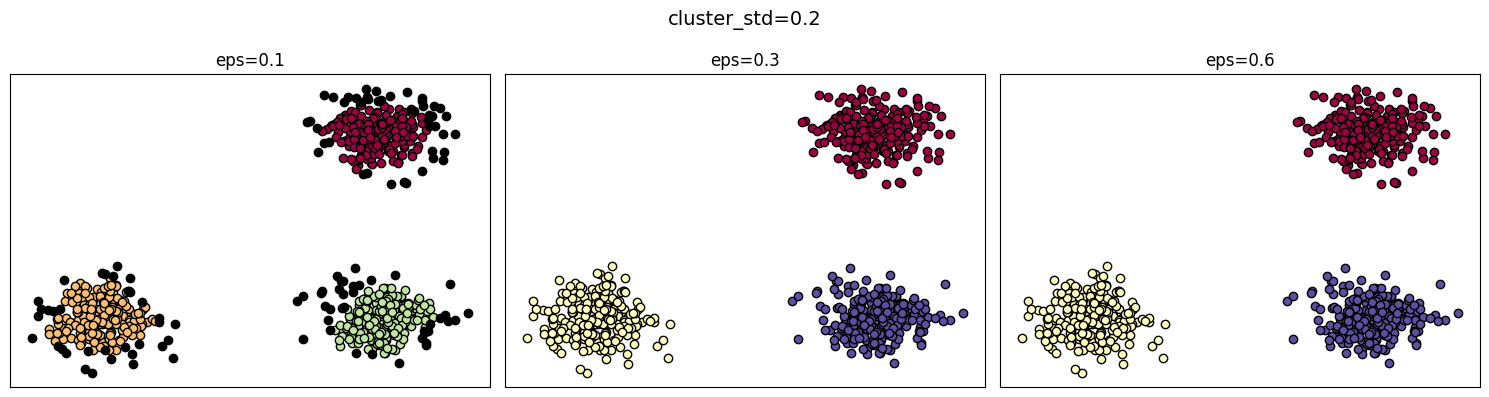

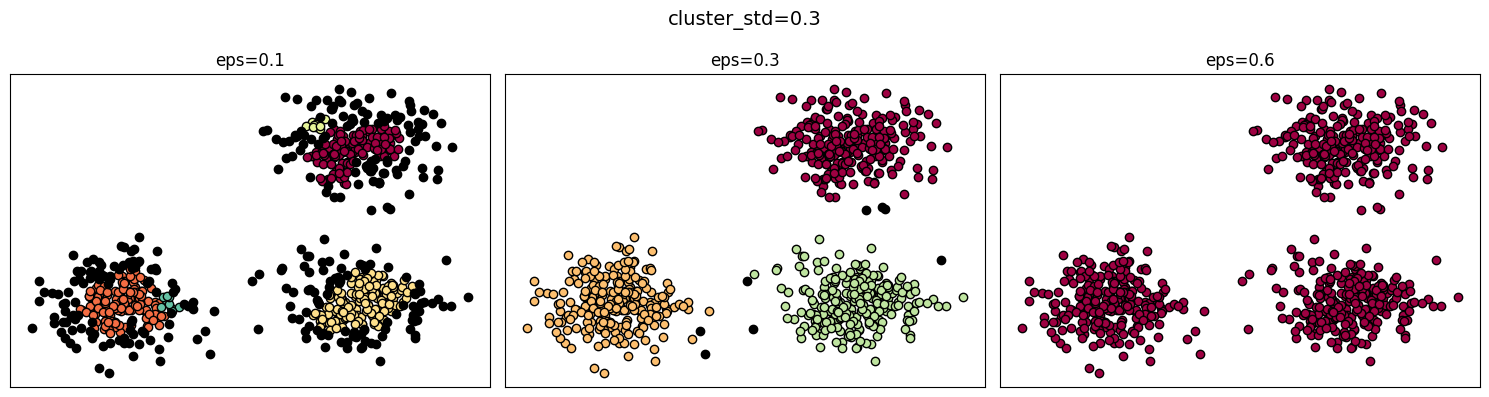

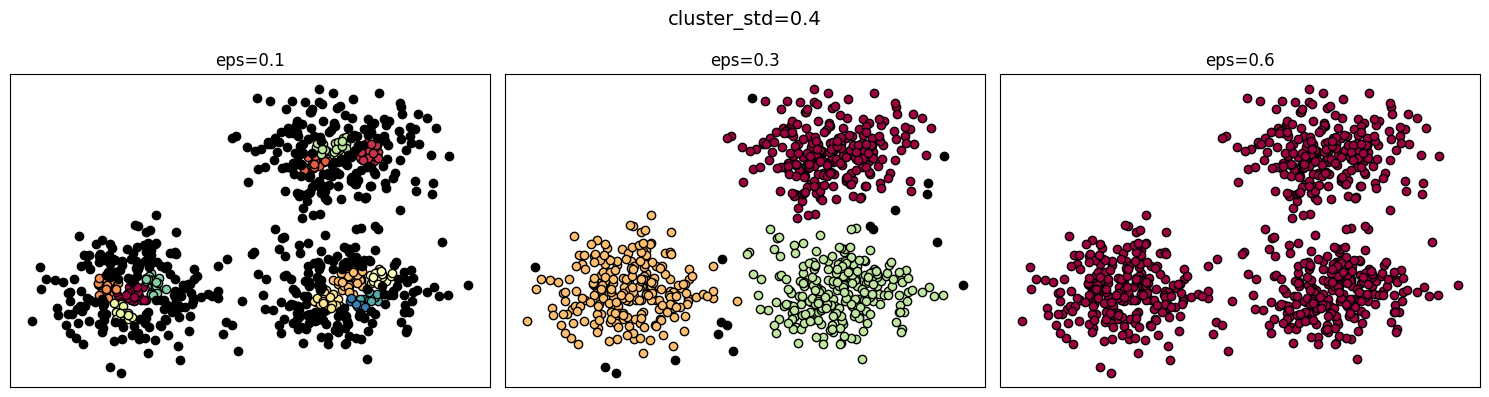

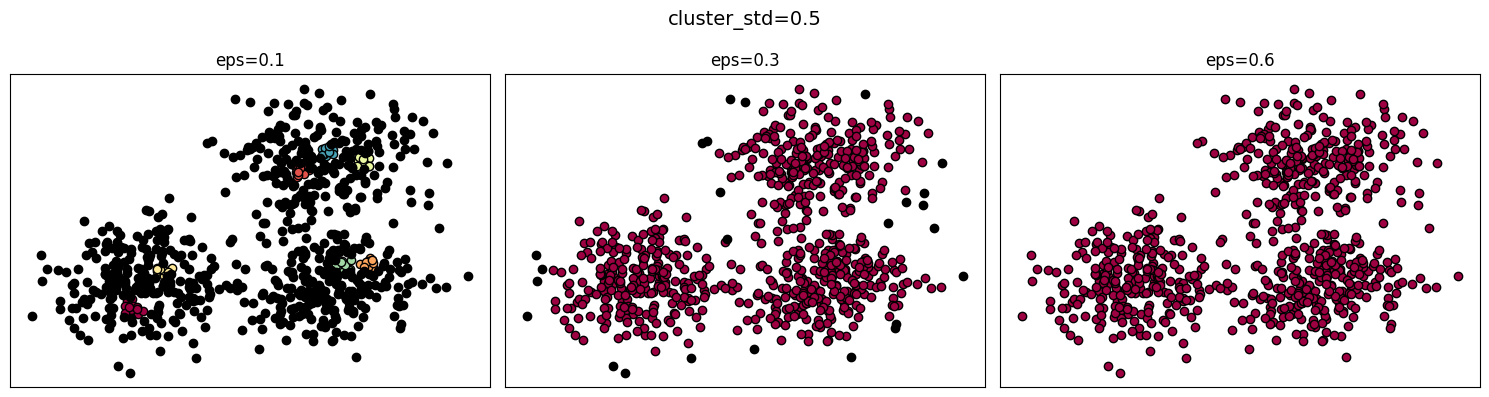

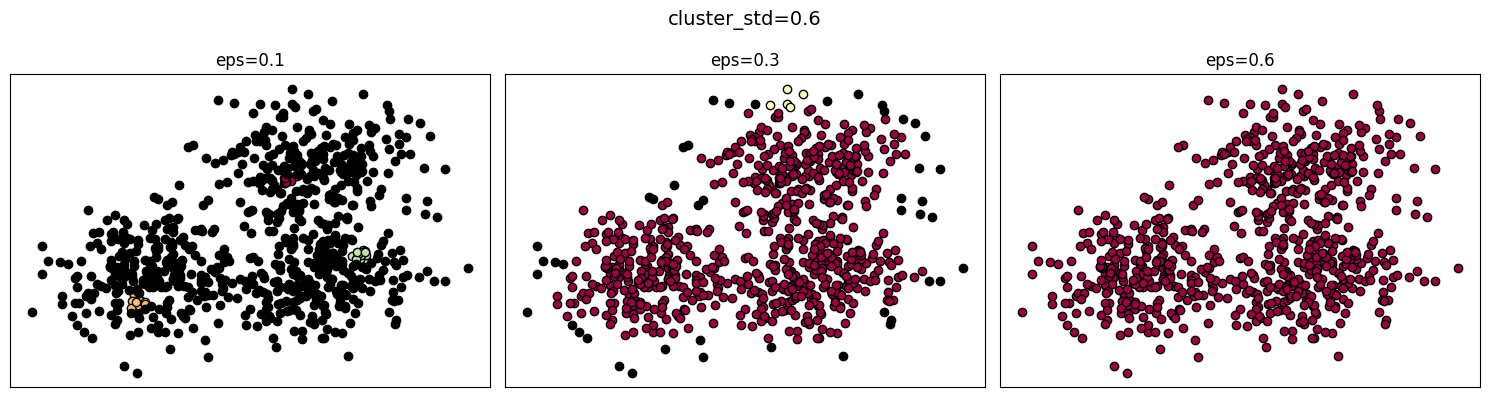

In [28]:
chosen_eps = [0.1, 0.3, 0.6]  # przykładowe wartości epsilon

# dane
for std in cluster_stds:
    X, _ = make_blobs(
        n_samples=750, centers=centers, cluster_std=std, random_state=0
    )
    X = StandardScaler().fit_transform(X)

    plt.figure(figsize=(15, 4))
    plt.suptitle(f"cluster_std={std}", fontsize=14)

    for j, eps in enumerate(chosen_eps): # petla po wartościach epsilom
        db = DBSCAN(eps=eps, min_samples=10).fit(X)
        labels = db.labels_

        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each) # generowanie koloru dla każdego klastra
                  for each in np.linspace(0, 1, len(unique_labels))]

        plt.subplot(1, len(chosen_eps), j + 1) # ilość wykresów w rzędzie w zależności od ilości wartości epsilon

        for k, col in zip(unique_labels, colors): # przypisanie koloru do klastra
            if k == -1:
                col = [0, 0, 0, 1]  # czarne dla szumów
            # dopasowanie który punkt należy do którego klastra
            class_member_mask = labels == k # porównywanie element po elemencie, aby znaleźć, który punkt należy i nie należy do klastra
            xy = X[class_member_mask] # wybiera punkty, które należą do klastra i robi z nich tablice
            plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6) # wykres

        plt.title(f"eps={eps}")
        plt.xticks([]) # brak podpisów osi oraz tych zaznaczeń na osi z wartościami
        plt.yticks([])

    plt.tight_layout()
    plt.show()